# Import Library

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import july
from july.utils import date_range
import plotly.express as px
import holidays
import os
import webbrowser
import os

# calendar_plot() cmap: Union[str, LinearSegmentedColormap, ListedColormap] = "july",

cwd = os.getcwd()

%matplotlib inline

# Eksplorasi Data Analysis

## Analisis Perusahaannya

In [148]:
df_m6 = pd.read_csv('M6_Universe.csv')
print('Ukuran Shape',df_m6.shape)
df_m6.head()

Ukuran Shape (100, 6)


,id,class,symbol,name,GICS_sector/ETF_type,GICS_industry/ETF_subtype
0,1,Stock,ABBV,AbbVie,Health Care,Pharmaceuticals
1,2,Stock,ACN,Accenture,Information Technology,IT Consulting & Other Services
2,3,Stock,AEP,American Electric Power,Utilities,Electric Utilities
3,4,Stock,AIZ,Assurant,Financials,Multi-line Insurance
4,5,Stock,ALLE,Allegion,Industrials,Building Products


In [149]:
for i in df_m6.columns:
    panjang_unique = len(df_m6[i].unique())
    if(panjang_unique < df_m6.shape[0]):
        print(i,len(df_m6[i].unique()),df_m6[i].unique())

class 2 ['Stock' 'ETF']
GICS_sector/ETF_type 15 ['Health Care' 'Information Technology' 'Utilities' 'Financials'
 'Industrials' 'Consumer Discretionary' 'Real Estate' 'Materials'
 'Consumer Staples' 'Communication Services' 'Energy' 'Equities'
 'Fixed Income' 'Commodities' 'Volatility']
GICS_industry/ETF_subtype 60 ['Pharmaceuticals' 'IT Consulting & Other Services' 'Electric Utilities'
 'Multi-line Insurance' 'Building Products' 'Semiconductor Equipment'
 'Asset Management & Custody Banks' 'Internet & Direct Marketing Retail'
 'Residential REITs' 'Paper Packaging' 'Consumer Finance'
 'Health Care Equipment' 'Distillers & Vintners'
 'Health Care Distributors' 'Data Processing & Outsourced Services'
 'Technology Distributors' 'Specialty Chemicals' 'Cable & Satellite'
 'Managed Health Care' 'Multi-Utilities'
 'Oil & Gas Exploration & Production' 'Diversified Support Services'
 'Casinos & Gaming' 'General Merchandise Stores' 'Restaurants'
 'Industrial REITs' 'Interactive Media & Services'

<AxesSubplot: xlabel='class', ylabel='count'>

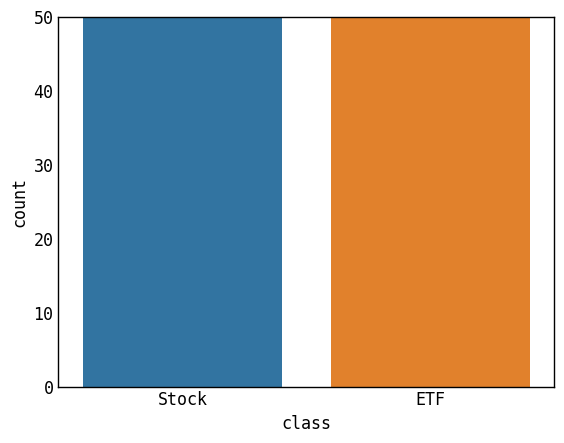

In [150]:
sns.countplot(x='class',data=df_m6)

Bisa diperhatikan, Bahwa jenis jenis sekuritas pada dataset tersebut memiliki banyak yang sama antara ETF dengan saham tersebut

## Analisis Harganya

In [151]:
df_price = pd.read_csv('assets_m6.csv')
print(df_price.head())
print('shape',df_price.shape)

  symbol        date    price
0   ABBV  2022/01/31  133.124
1    ACN  2022/01/31  349.726
2    AEP  2022/01/31   87.403
3    AIZ  2022/01/31  149.851
4   ALLE  2022/01/31  121.261
shape (20999, 3)


In [152]:
urutan_tanggal = np.arange(min(df_price.date.astype('datetime64')),max(df_price.date.astype('datetime64')) + np.timedelta64(1,'D'),dtype='datetime64[D]')
urutan_tanggal.shape

(303,)

In [153]:
kolom_tanggal = np.array(list(map(lambda x : x.replace('/','-'), df_price.date.unique())),dtype='datetime64[D]')
kolom_tanggal.shape

(216,)

In [154]:
tanggal_kosong = np.setdiff1d(urutan_tanggal,kolom_tanggal)
tanggal_kosong = tanggal_kosong.astype('str')
tanggal_kosong = np.array(list(map(lambda x : x.replace('-','/'),tanggal_kosong)))
tanggal_kosong

array(['2022/02/05', '2022/02/06', '2022/02/12', '2022/02/13',
       '2022/02/19', '2022/02/20', '2022/02/26', '2022/02/27',
       '2022/03/05', '2022/03/06', '2022/03/12', '2022/03/13',
       '2022/03/19', '2022/03/20', '2022/03/26', '2022/03/27',
       '2022/04/02', '2022/04/03', '2022/04/09', '2022/04/10',
       '2022/04/15', '2022/04/16', '2022/04/17', '2022/04/23',
       '2022/04/24', '2022/04/30', '2022/05/01', '2022/05/07',
       '2022/05/08', '2022/05/14', '2022/05/15', '2022/05/21',
       '2022/05/22', '2022/05/28', '2022/05/29', '2022/06/04',
       '2022/06/05', '2022/06/11', '2022/06/12', '2022/06/18',
       '2022/06/19', '2022/06/25', '2022/06/26', '2022/07/02',
       '2022/07/03', '2022/07/09', '2022/07/10', '2022/07/16',
       '2022/07/17', '2022/07/23', '2022/07/24', '2022/07/30',
       '2022/07/31', '2022/08/06', '2022/08/07', '2022/08/13',
       '2022/08/14', '2022/08/20', '2022/08/21', '2022/08/27',
       '2022/08/28', '2022/09/03', '2022/09/04', '2022/

In [155]:
df_price

,symbol,date,price
0,ABBV,2022/01/31,133.124
1,ACN,2022/01/31,349.726
2,AEP,2022/01/31,87.403
3,AIZ,2022/01/31,149.851
4,ALLE,2022/01/31,121.261
...,...,...,...
20994,XLP,2022/11/29,75.670
20995,XLU,2022/11/29,69.690
20996,XLV,2022/11/29,135.780
20997,XLY,2022/11/29,141.300


In [156]:
df_price_wide = pd.pivot(df_price,index='symbol',columns='date',values='price')
df_price_wide

date,2022/01/31,2022/02/01,2022/02/02,2022/02/03,2022/02/04,2022/02/07,2022/02/08,2022/02/09,2022/02/10,2022/02/11,...,2022/11/16,2022/11/17,2022/11/18,2022/11/21,2022/11/22,2022/11/23,2022/11/24,2022/11/25,2022/11/28,2022/11/29
symbol,,,,,,,,,,,,,,,,,,,,,
ABBV,133.124,133.231,134.806,136.858,136.780,138.609,139.562,139.260,138.784,138.103,...,151.870,152.16,154.980,157.110,159.790,159.39,NaN,159.62,158.43,158.20
ACN,349.726,349.567,355.551,341.783,343.712,340.210,341.308,351.654,338.658,325.592,...,291.510,287.14,286.500,287.020,292.890,294.53,NaN,296.40,290.60,287.98
AEP,87.403,85.421,86.901,87.200,86.214,86.833,87.210,87.171,85.230,85.484,...,89.740,89.07,91.280,93.150,93.710,95.13,NaN,95.47,95.22,94.65
AIZ,149.851,148.613,150.323,149.154,150.401,150.077,153.320,163.656,159.736,159.107,...,125.067,122.78,124.262,125.803,126.479,126.34,NaN,128.49,125.22,126.39
ALLE,121.261,118.563,118.741,114.720,117.822,119.018,120.263,123.681,119.245,117.447,...,111.050,110.77,112.960,112.660,113.940,113.99,NaN,114.32,112.25,110.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XLP,74.589,74.521,75.414,75.434,74.511,74.648,74.933,74.953,74.148,73.882,...,73.910,73.89,74.680,75.390,75.940,76.20,NaN,76.25,75.96,75.67
XLU,67.791,66.890,67.879,67.575,67.037,66.939,66.988,67.282,65.578,65.618,...,68.620,67.42,68.850,69.160,69.750,70.53,NaN,70.94,70.21,69.69
XLV,129.767,130.113,131.863,131.299,130.824,130.597,131.665,132.684,130.607,128.797,...,133.020,132.96,134.570,134.630,135.800,136.34,NaN,137.15,136.12,135.78


In [157]:
for i in tanggal_kosong:
    df_price_wide[i] = np.NaN
df_price_wide = df_price_wide[sorted(df_price_wide.columns.tolist())]

In [158]:
import plotly.express as px
import plotly.graph_objects as pog
import calendar

grafiknya = pog.Figure()

tanggal = np.array(pd.to_datetime(df_price_wide.columns.to_numpy()).to_numpy(),dtype=np.datetime64)

selector = 100*[False]
button_all = []
sel_num = 0



for i in df_price_wide.index:
    grafiknya.add_trace(
        pog.Line(x=tanggal,y=df_price_wide.loc[i,],name=i)
    )
    
    selector[sel_num] = True
    hasilku = selector
    button_1 = dict(
        label = i,
        method="update",
        args=[
            {"visible":selector[:100]},
            {'title':{'text':'Grafik Harga Saham '+ i}}
        ]
    )
    selector[sel_num] = False
    sel_num += 1
    button_all.append(button_1)

kamus = dict(
    label="All",
    method="update",
    args=[
            {"visible":100*[True]},
            {'title':{'text':'Grafik Harga Saham Seluruhnya'}}
        ]
)

button_all.insert(0,kamus)


grafiknya.update_layout(
    updatemenus=[
        dict(
            buttons = list(
                button_all
            ),
            direction="down",
            pad={"r": 20, "t": 10},
            showactive=True
        )
    ]
)
grafiknya.show()

c:\Users\ASUS\.conda\envs\ml\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Interpretasi grafik :
* nilai saham tertinggi berasal dari perusahaan IEFM.L 
* Setengah dari beberapa saham tersebut memiliki perubahan yang sama dan cenderung sejajar
* Untuk Saham CHTR memiliki grafik yang memotong dibandingkan saham UNH

In [159]:
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets


url_graf_sel_sah = "assets/grafik_seluruh_saham.html"
grafiknya.write_html(url_graf_sel_sah)

button = widgets.Button(description='Grafik Saham',button_style='primary')

# generate an URL
def on_click_browser(_):
    url = cwd+'/'+url_graf_sel_sah
    webbrowser.open(url)

button.on_click(on_click_browser)
button


Button(button_style='primary', description='Grafik Saham', style=ButtonStyle())

In [160]:
import pandas as pd
from datetime import date
import holidays
from workalendar.europe import Germany

In [161]:
rata_rata_saham = df_price_wide.mean()
rata_rata_saham = pd.DataFrame(rata_rata_saham,columns=['price'])
rata_rata_saham['non_nan'] = rata_rata_saham['price'].apply(lambda x : 1 if(np.isnan(x)) else 0)
rata_rata_saham

,price,non_nan
date,,
2022/01/31,122.667010,0
2022/02/01,123.441650,0
2022/02/02,123.941190,0
2022/02/03,121.688530,0
2022/02/04,121.522770,0
...,...,...
2022/11/25,114.457920,0
2022/11/26,NaN,1
2022/11/27,NaN,1


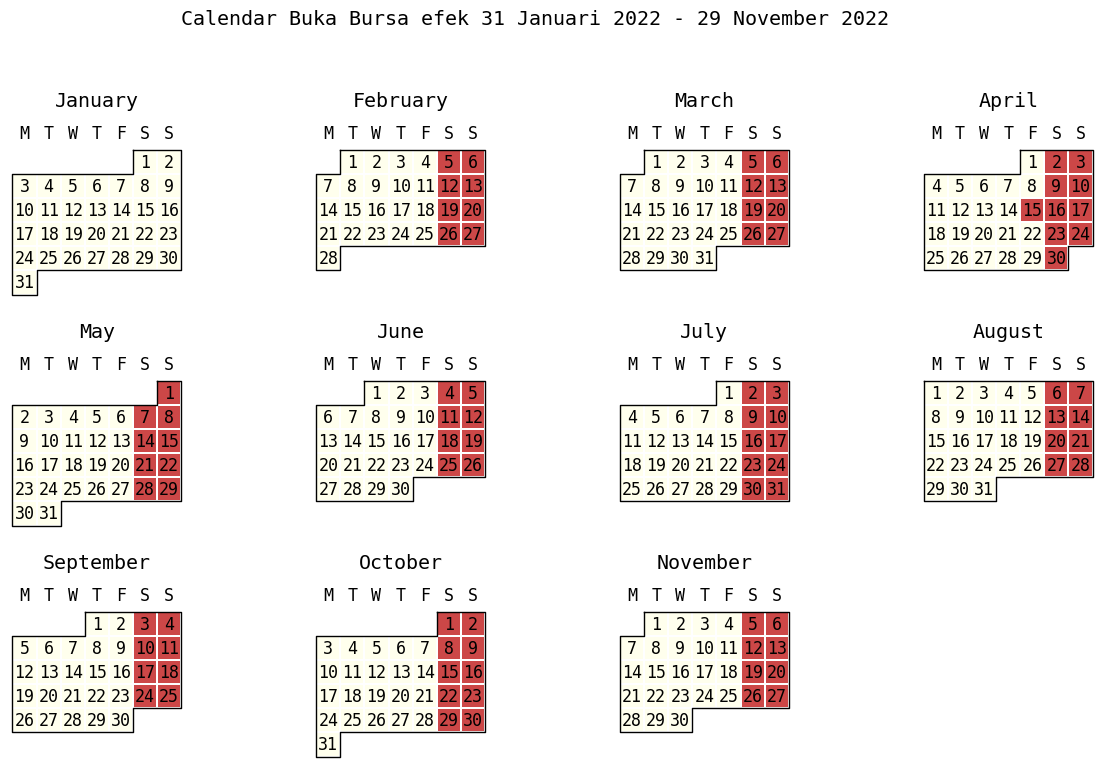

In [162]:
july.calendar_plot(dates=np.array(tanggal,dtype='datetime64[D]').astype(datetime),date_label= True, weeknum_label = False,
                    data=rata_rata_saham['non_nan'],title=False)
plt.suptitle('Calendar Buka Bursa efek 31 Januari 2022 - 29 November 2022',y=1.05)
px.line(x=tanggal,y=df_price_wide.mean(),title="Grafik rata rata seluruh saham")


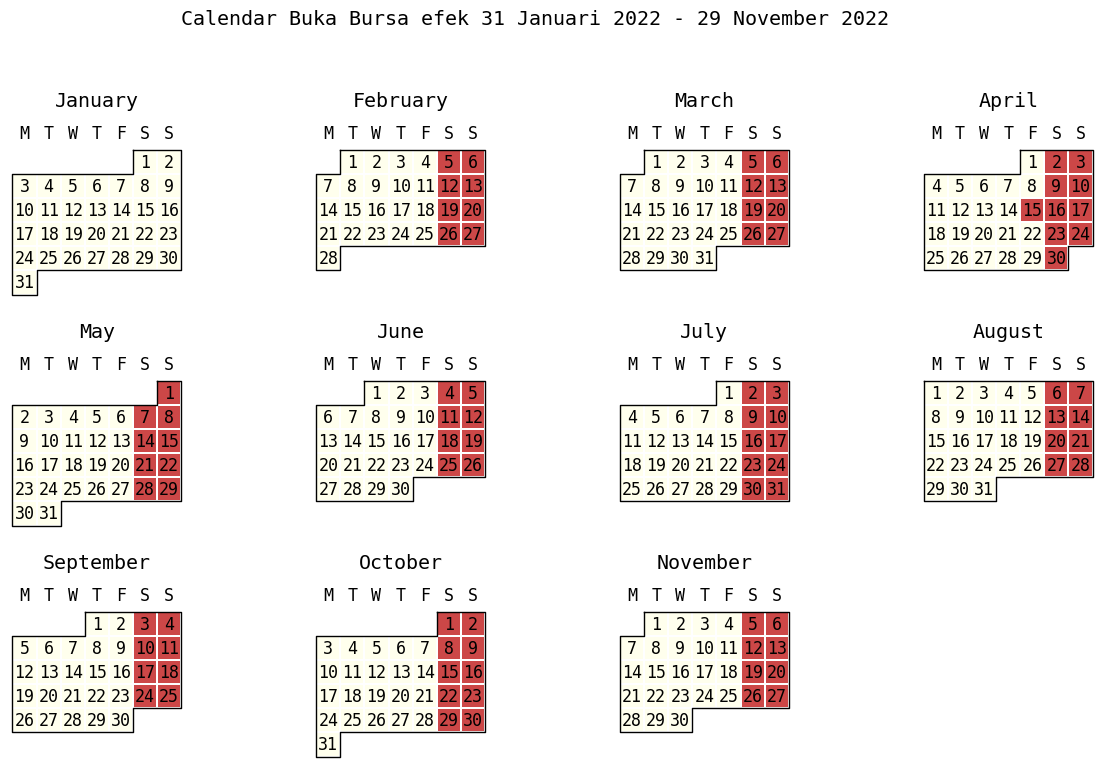

In [163]:
july.calendar_plot(dates=np.array(tanggal,dtype='datetime64[D]').astype(datetime),date_label= True, weeknum_label = False,
                    data=rata_rata_saham['non_nan'],title=False)
plt.suptitle('Calendar Buka Bursa efek 31 Januari 2022 - 29 November 2022',y=1.05)
plt.savefig('assets/Calendar Buka Bursa efek 31 Januari 2022 - 29 November 2022.jpeg')

In [164]:
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

hasil = px.line(x=tanggal,y=df_price_wide.mean(),title="Grafik rata rata seluruh saham")

url_graf_sel_sah = "assets/Grafik_rata_rata_seluruh_saham.html"
hasil.write_html("assets/Grafik_rata_rata_seluruh_saham.html")

button = widgets.Button(description='Grafik Saham',button_style='primary')

# generate an URL
def on_click_browser(_):
    url = cwd+'/'+url_graf_sel_sah
    webbrowser.open(url)

button.on_click(on_click_browser)
button


Button(button_style='primary', description='Grafik Saham', style=ButtonStyle())

Kalendar yang ditandai merah merupakan waktu bursa efek ditutup: 
* kira kira pada hari weekend saja
* pada 15 April 2022, itu adalah hari [Good Friday](https://www.britannica.com/topic/Good-Friday) yakni hari penyaliban Jesus menurut Agama kristen


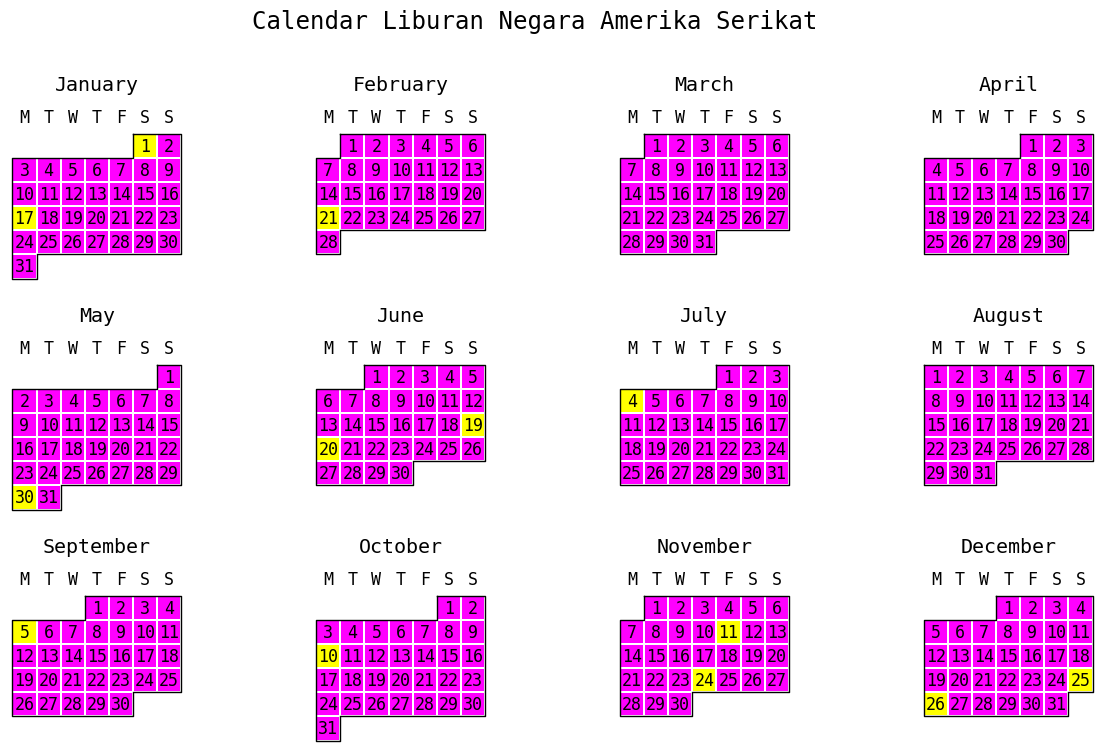

In [165]:
hasil = holidays.US(years=2022)

july.calendar_plot(dates=list(hasil.keys()),date_label= True, weeknum_label = False,
                    data=len(list(hasil.keys()))*[1],cmap="spring")
plt.suptitle("Calendar Liburan Negara Amerika Serikat", fontsize="x-large", y=1.03)


px.line(x=tanggal,y=df_price_wide.mean(),title="Grafik rata rata seluruh saham")

Berdasarkan dari grafik ini. Perubahan Kalendar mengalami penurunan dan kenaikan secara dratis pada saat Hari menjelang libur, liburan , dan setelah liburan . hal itu dibuktikan dengan tanggal yang ada di grafik harga saham 

##### sembunyikan

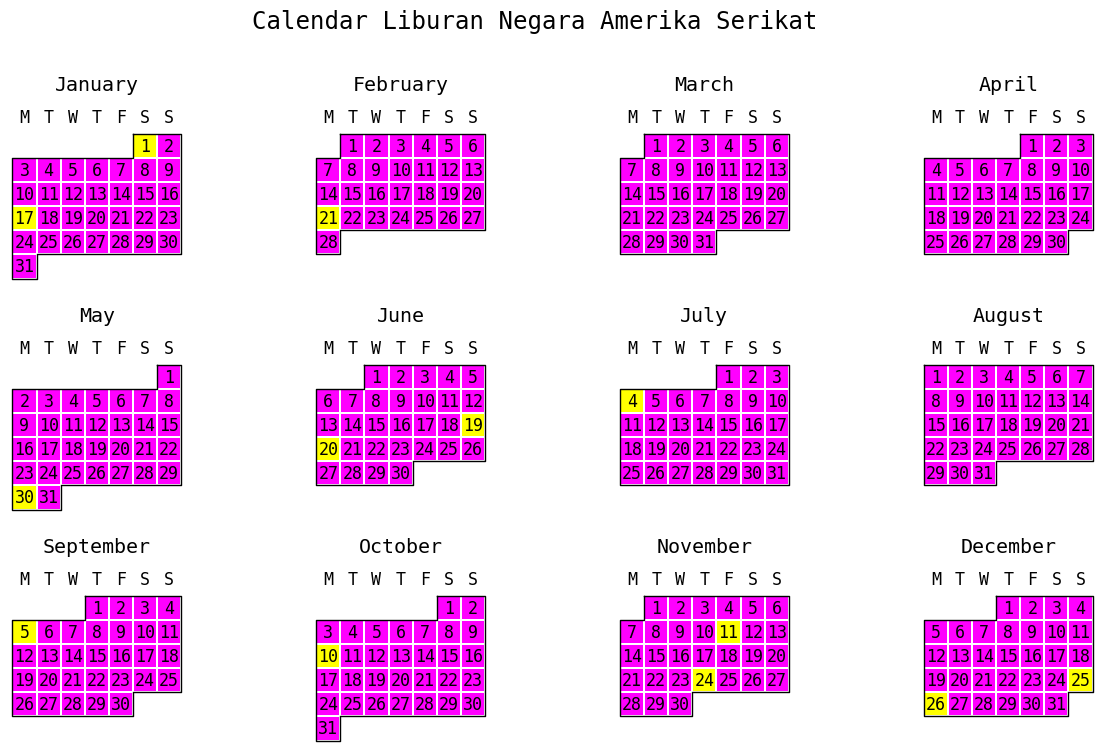

In [166]:
july.calendar_plot(dates=list(hasil.keys()),date_label= True, weeknum_label = False,
                    data=len(list(hasil.keys()))*[1],cmap="spring")
plt.suptitle("Calendar Liburan Negara Amerika Serikat", fontsize="x-large", y=1.03)
plt.savefig("assets/Calendar Liburan Negara Amerika Serikat.jpeg")

##### Tidak Sembunyi

## Gabungkan Antara harga dengan sahamnya

In [167]:
df_price_wide = df_price_wide.reset_index()
# df_price_wide.index.name = None 
df_price_wide = df_price_wide.rename_axis(None, axis=1)

df_price_wide



,symbol,2022/01/31,2022/02/01,2022/02/02,2022/02/03,2022/02/04,2022/02/05,2022/02/06,2022/02/07,2022/02/08,...,2022/11/20,2022/11/21,2022/11/22,2022/11/23,2022/11/24,2022/11/25,2022/11/26,2022/11/27,2022/11/28,2022/11/29
0,ABBV,133.124,133.231,134.806,136.858,136.780,NaN,NaN,138.609,139.562,...,NaN,157.110,159.790,159.39,NaN,159.62,NaN,NaN,158.43,158.20
1,ACN,349.726,349.567,355.551,341.783,343.712,NaN,NaN,340.210,341.308,...,NaN,287.020,292.890,294.53,NaN,296.40,NaN,NaN,290.60,287.98
2,AEP,87.403,85.421,86.901,87.200,86.214,NaN,NaN,86.833,87.210,...,NaN,93.150,93.710,95.13,NaN,95.47,NaN,NaN,95.22,94.65
3,AIZ,149.851,148.613,150.323,149.154,150.401,NaN,NaN,150.077,153.320,...,NaN,125.803,126.479,126.34,NaN,128.49,NaN,NaN,125.22,126.39
4,ALLE,121.261,118.563,118.741,114.720,117.822,NaN,NaN,119.018,120.263,...,NaN,112.660,113.940,113.99,NaN,114.32,NaN,NaN,112.25,110.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,XLP,74.589,74.521,75.414,75.434,74.511,NaN,NaN,74.648,74.933,...,NaN,75.390,75.940,76.20,NaN,76.25,NaN,NaN,75.96,75.67
96,XLU,67.791,66.890,67.879,67.575,67.037,NaN,NaN,66.939,66.988,...,NaN,69.160,69.750,70.53,NaN,70.94,NaN,NaN,70.21,69.69
97,XLV,129.767,130.113,131.863,131.299,130.824,NaN,NaN,130.597,131.665,...,NaN,134.630,135.800,136.34,NaN,137.15,NaN,NaN,136.12,135.78
98,XLY,183.866,184.980,183.876,178.249,183.319,NaN,NaN,182.942,185.516,...,NaN,138.950,140.520,142.55,NaN,142.63,NaN,NaN,141.75,141.30


In [168]:
df_gabung = df_m6.merge(df_price_wide,on="symbol")

In [169]:
df_gabung_class = df_gabung.groupby('class').mean(numeric_only=True)
df_gabung_class = df_gabung_class.drop('id',axis=1)
df_gabung_class

,2022/01/31,2022/02/01,2022/02/02,2022/02/03,2022/02/04,2022/02/05,2022/02/06,2022/02/07,2022/02/08,2022/02/09,...,2022/11/20,2022/11/21,2022/11/22,2022/11/23,2022/11/24,2022/11/25,2022/11/26,2022/11/27,2022/11/28,2022/11/29
class,,,,,,,,,,,,,,,,,,,,,
ETF,83.15824,83.75248,84.23680,83.01748,82.91230,NaN,NaN,82.98188,83.13774,84.37112,...,NaN,74.71600,75.47532,75.83896,100.3966,75.96270,NaN,NaN,75.28726,75.417440
Stock,162.17578,163.13082,163.64558,160.35958,160.13324,NaN,NaN,159.57528,161.21372,163.67890,...,NaN,149.52434,151.48794,152.42196,NaN,152.95314,NaN,NaN,150.63260,152.582449


In [170]:
import plotly.graph_objs as go
import plotly.express as px

fig = pog.Figure()
fig.add_trace(pog.Line(name="ETF",x=tanggal,y=df_gabung_class.loc['ETF',].to_numpy()))
fig.add_trace(pog.Line(name="Stock",x=tanggal,y=df_gabung_class.loc['Stock',].to_numpy()))
fig.update_layout(
    title={
        'text': "Harga Saham berdasarkan jenis sekuritas",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

c:\Users\ASUS\.conda\envs\ml\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Berdasarkan Gambar tersebut . Maka Interpretasinya adalah:
* Stock memiliki nilai lebih tinggi dibandingkan denmgan ETF
* ETF lebih stabli meskipun ada titik kritis
* Saham Lebih flukluatif dibandingkan ETF

In [171]:
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

url_graf = "assets/Harga_saham_securitas.html"
fig.write_html(url_graf_sel_sah)

button = widgets.Button(description='Grafik Saham',button_style='primary')

# generate an URL
def on_click_browser(_):
    url = cwd+'/'+url_graf
    webbrowser.open(url)

button.on_click(on_click_browser)
button

Button(button_style='primary', description='Grafik Saham', style=ButtonStyle())

In [172]:
df_gabung_kat = df_gabung.groupby("GICS_sector/ETF_type").mean(numeric_only=True)
df_gabung_kat = df_gabung_kat.drop('id',axis=1)
df_gabung_kat

,2022/01/31,2022/02/01,2022/02/02,2022/02/03,2022/02/04,2022/02/05,2022/02/06,2022/02/07,2022/02/08,2022/02/09,...,2022/11/20,2022/11/21,2022/11/22,2022/11/23,2022/11/24,2022/11/25,2022/11/26,2022/11/27,2022/11/28,2022/11/29
GICS_sector/ETF_type,,,,,,,,,,,,,,,,,,,,,
Commodities,24.713333,24.823333,24.876667,24.823333,24.950000,NaN,NaN,25.186667,25.196667,25.343333,...,NaN,24.536667,24.706667,24.766667,NaN,24.673333,NaN,NaN,24.373333,24.626667
Communication Services,347.432667,351.256000,357.092000,330.286667,329.675333,NaN,NaN,324.866000,322.837667,329.401000,...,NaN,191.563333,198.106667,200.430000,NaN,199.706667,NaN,NaN,196.500000,196.726667
Consumer Discretionary,185.120333,187.177667,185.035167,180.427667,182.011833,NaN,NaN,181.078667,183.672667,186.526500,...,NaN,178.526667,179.195000,181.883333,NaN,181.903333,NaN,NaN,179.606667,179.090000
Consumer Staples,89.015000,88.979333,90.199000,90.920333,89.661000,NaN,NaN,89.242667,89.489000,89.422333,...,NaN,87.656667,88.646667,88.953333,NaN,89.496667,NaN,NaN,89.120000,88.650000
Energy,79.009000,82.750000,82.970500,81.876000,83.187500,NaN,NaN,84.171500,82.375500,82.967500,...,NaN,118.230000,122.080000,120.175000,NaN,120.010000,NaN,NaN,116.825000,117.395000
Equities,91.822081,92.673568,93.308568,91.700541,91.695027,NaN,NaN,91.788081,92.095838,93.721000,...,NaN,83.206324,84.145351,84.538676,148.859667,84.726162,NaN,NaN,83.852081,84.046838
Financials,175.179429,176.895714,178.864857,176.232429,178.291000,NaN,NaN,179.330429,182.681286,184.969857,...,NaN,177.193286,179.582714,180.121429,NaN,181.421429,NaN,NaN,177.991429,179.581429
Fixed Income,73.882778,73.821333,73.930333,73.522667,73.005444,NaN,NaN,72.995000,72.694556,72.904333,...,NaN,63.065111,63.427556,63.848556,27.702000,63.787444,NaN,NaN,63.666222,63.529889
Health Care,169.774500,169.046500,172.042500,176.374333,175.180667,NaN,NaN,175.937333,179.662500,180.892500,...,NaN,182.465000,184.190000,185.670000,NaN,187.418333,NaN,NaN,186.128333,185.935000


In [173]:
import plotly.graph_objs as go
import plotly.express as px


kategori = df_gabung_kat.index.tolist()

fig = pog.Figure()
for kat in kategori:
    fig.add_trace(pog.Line(name=kat,x=tanggal,y=df_gabung_kat.loc[kat,].to_numpy()))

fig.update_layout(
    title={
        'text': "Harga Saham berdasarkan Kategori",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

c:\Users\ASUS\.conda\envs\ml\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Berdasarkan Gambar tersebut . Maka Interpretasinya adalah:
* Communication Service merupakan kategori dengan nilai tertinggi dibandingkan yang lain
* Volatility merupakan kategori dengan nilai terendah dibandingkan yang lain
* Ekuitas memiliki titik kritis di beberapa tempat 

In [174]:
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

url_graf = 'assets/Harga_saham_berdasarkan_kategori.html'
fig.write_html(url_graf_sel_sah)

button = widgets.Button(description='Grafik Saham',button_style='primary')

# generate an URL
def on_click_browser(_):
    url = cwd+'/'+url_graf
    webbrowser.open(url)

button.on_click(on_click_browser)
button

Button(button_style='primary', description='Grafik Saham', style=ButtonStyle())

In [175]:
df_gabung

,id,class,symbol,name,GICS_sector/ETF_type,GICS_industry/ETF_subtype,2022/01/31,2022/02/01,2022/02/02,2022/02/03,...,2022/11/20,2022/11/21,2022/11/22,2022/11/23,2022/11/24,2022/11/25,2022/11/26,2022/11/27,2022/11/28,2022/11/29
0,1,Stock,ABBV,AbbVie,Health Care,Pharmaceuticals,133.124,133.231,134.806,136.858,...,NaN,157.110,159.790,159.39,NaN,159.62,NaN,NaN,158.43,158.20
1,2,Stock,ACN,Accenture,Information Technology,IT Consulting & Other Services,349.726,349.567,355.551,341.783,...,NaN,287.020,292.890,294.53,NaN,296.40,NaN,NaN,290.60,287.98
2,3,Stock,AEP,American Electric Power,Utilities,Electric Utilities,87.403,85.421,86.901,87.200,...,NaN,93.150,93.710,95.13,NaN,95.47,NaN,NaN,95.22,94.65
3,4,Stock,AIZ,Assurant,Financials,Multi-line Insurance,149.851,148.613,150.323,149.154,...,NaN,125.803,126.479,126.34,NaN,128.49,NaN,NaN,125.22,126.39
4,5,Stock,ALLE,Allegion,Industrials,Building Products,121.261,118.563,118.741,114.720,...,NaN,112.660,113.940,113.99,NaN,114.32,NaN,NaN,112.25,110.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,ETF,XLC,Communication Services Select Sector SPDR Fund,Equities,Sector-US,73.431,74.067,75.546,70.492,...,NaN,49.120,49.850,50.48,NaN,50.20,NaN,NaN,49.40,49.42
96,97,ETF,XLU,Utilities Select Sector SPDR Fund,Equities,Sector-US,67.791,66.890,67.879,67.575,...,NaN,69.160,69.750,70.53,NaN,70.94,NaN,NaN,70.21,69.69
97,98,ETF,XLP,Consumer Staples Select Sector SPDR Fund,Equities,Sector-US,74.589,74.521,75.414,75.434,...,NaN,75.390,75.940,76.20,NaN,76.25,NaN,NaN,75.96,75.67
98,99,ETF,XLB,Materials Select Sector SPDR Fund,Equities,Sector-US,83.023,84.301,84.567,83.092,...,NaN,80.260,82.080,82.40,NaN,82.37,NaN,NaN,80.53,80.80


# Pembersihan Data

In [176]:
df_gabung = df_gabung.dropna(how='all',axis=1)

In [177]:
df_harga = df_gabung.iloc[:,6:]
df_harga

,2022/01/31,2022/02/01,2022/02/02,2022/02/03,2022/02/04,2022/02/07,2022/02/08,2022/02/09,2022/02/10,2022/02/11,...,2022/11/16,2022/11/17,2022/11/18,2022/11/21,2022/11/22,2022/11/23,2022/11/24,2022/11/25,2022/11/28,2022/11/29
0,133.124,133.231,134.806,136.858,136.780,138.609,139.562,139.260,138.784,138.103,...,151.870,152.16,154.980,157.110,159.790,159.39,NaN,159.62,158.43,158.20
1,349.726,349.567,355.551,341.783,343.712,340.210,341.308,351.654,338.658,325.592,...,291.510,287.14,286.500,287.020,292.890,294.53,NaN,296.40,290.60,287.98
2,87.403,85.421,86.901,87.200,86.214,86.833,87.210,87.171,85.230,85.484,...,89.740,89.07,91.280,93.150,93.710,95.13,NaN,95.47,95.22,94.65
3,149.851,148.613,150.323,149.154,150.401,150.077,153.320,163.656,159.736,159.107,...,125.067,122.78,124.262,125.803,126.479,126.34,NaN,128.49,125.22,126.39
4,121.261,118.563,118.741,114.720,117.822,119.018,120.263,123.681,119.245,117.447,...,111.050,110.77,112.960,112.660,113.940,113.99,NaN,114.32,112.25,110.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,73.431,74.067,75.546,70.492,70.671,69.439,69.410,71.366,70.343,68.824,...,50.060,49.68,49.530,49.120,49.850,50.48,NaN,50.20,49.40,49.42
96,67.791,66.890,67.879,67.575,67.037,66.939,66.988,67.282,65.578,65.618,...,68.620,67.42,68.850,69.160,69.750,70.53,NaN,70.94,70.21,69.69
97,74.589,74.521,75.414,75.434,74.511,74.648,74.933,74.953,74.148,73.882,...,73.910,73.89,74.680,75.390,75.940,76.20,NaN,76.25,75.96,75.67
98,83.023,84.301,84.567,83.092,81.716,81.313,82.571,84.370,83.879,82.581,...,80.230,79.46,79.990,80.260,82.080,82.40,NaN,82.37,80.53,80.80


In [178]:
df_gabung = df_gabung.iloc[:,:6]

In [179]:
df_harga = df_harga.interpolate(axis=1)
kolom_harga = df_harga.columns
df_harga.isna().sum()[df_harga.isna().sum() != 0]

Series([], dtype: int64)

In [180]:
from sklearn.preprocessing import StandardScaler
stdsca = StandardScaler()
df_harga = stdsca.fit_transform(df_harga)
df_harga = pd.DataFrame(df_harga,columns=kolom_harga)
df_harga

,2022/01/31,2022/02/01,2022/02/02,2022/02/03,2022/02/04,2022/02/07,2022/02/08,2022/02/09,2022/02/10,2022/02/11,...,2022/11/16,2022/11/17,2022/11/18,2022/11/21,2022/11/22,2022/11/23,2022/11/24,2022/11/25,2022/11/28,2022/11/29
0,0.080758,0.075006,0.082538,0.116989,0.118396,0.134412,0.134433,0.115682,0.128689,0.139250,...,0.335385,0.342154,0.356020,0.374443,0.380340,0.369360,0.368283,0.366693,0.372917,0.371762
1,1.753556,1.732565,1.759496,1.697401,1.724189,1.697992,1.694361,1.728429,1.669788,1.610996,...,1.502571,1.473097,1.449508,1.455663,1.473517,1.472229,1.475683,1.477276,1.456892,1.438146
2,-0.272341,-0.291313,-0.281387,-0.265981,-0.273996,-0.267154,-0.270360,-0.279839,-0.284231,-0.273797,...,-0.183931,-0.186452,-0.173596,-0.157886,-0.162388,-0.155062,-0.154670,-0.154172,-0.145492,-0.150419
3,0.209940,0.192862,0.200418,0.211818,0.224095,0.223355,0.240812,0.300925,0.290236,0.304127,...,0.111351,0.095990,0.100624,0.113880,0.106750,0.099641,0.106908,0.113933,0.100549,0.110384
4,-0.010858,-0.037380,-0.039505,-0.053742,-0.028718,-0.017533,-0.014789,-0.002612,-0.021964,-0.022895,...,-0.005810,-0.004637,0.006656,0.004493,0.003765,-0.001146,-0.001095,-0.001120,-0.005822,-0.017963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.380245,-0.378307,-0.367649,-0.394835,-0.394610,-0.402058,-0.407992,-0.399850,-0.399016,-0.404574,...,-0.515597,-0.516485,-0.520716,-0.524340,-0.522620,-0.519447,-0.520871,-0.521741,-0.521279,-0.522067
96,-0.423803,-0.433297,-0.425894,-0.417332,-0.422810,-0.421448,-0.426719,-0.430860,-0.435755,-0.429740,...,-0.360463,-0.367849,-0.360085,-0.357551,-0.359177,-0.355821,-0.354753,-0.353343,-0.350608,-0.355512
97,-0.371302,-0.374828,-0.368652,-0.356722,-0.364812,-0.361658,-0.365287,-0.372613,-0.369678,-0.364870,...,-0.316246,-0.313639,-0.311613,-0.305699,-0.308337,-0.309548,-0.310037,-0.310229,-0.303450,-0.306375
98,-0.306167,-0.299894,-0.299118,-0.297662,-0.308901,-0.309966,-0.306229,-0.301108,-0.294648,-0.296585,...,-0.263420,-0.266970,-0.267464,-0.265167,-0.257908,-0.258950,-0.259863,-0.260537,-0.265970,-0.264222


In [181]:
np_harga =  df_harga.to_numpy()
df_gabung['seq_price'] = 0
df_gabung['seq_price'] = df_gabung['seq_price'].astype('object')

for i in range(df_gabung.shape[0]):
    df_gabung.at[i,'seq_price'] = np_harga[i,]
df_gabung


,id,class,symbol,name,GICS_sector/ETF_type,GICS_industry/ETF_subtype,seq_price
0,1,Stock,ABBV,AbbVie,Health Care,Pharmaceuticals,"[0.08075840741815742, 0.07500566197616174, 0.0..."
1,2,Stock,ACN,Accenture,Information Technology,IT Consulting & Other Services,"[1.753556465328479, 1.7325646305772289, 1.7594..."
2,3,Stock,AEP,American Electric Power,Utilities,Electric Utilities,"[-0.27234082530230586, -0.2913129086215058, -0..."
3,4,Stock,AIZ,Assurant,Financials,Multi-line Insurance,"[0.2099395466258561, 0.1928620153108893, 0.200..."
4,5,Stock,ALLE,Allegion,Industrials,Building Products,"[-0.010858490675997503, -0.037380047990928526,..."
...,...,...,...,...,...,...,...
95,96,ETF,XLC,Communication Services Select Sector SPDR Fund,Equities,Sector-US,"[-0.38024534356678646, -0.37830686491863863, -..."
96,97,ETF,XLU,Utilities Select Sector SPDR Fund,Equities,Sector-US,"[-0.4238025639369318, -0.43329679131854365, -0..."
97,98,ETF,XLP,Consumer Staples Select Sector SPDR Fund,Equities,Sector-US,"[-0.371302212150363, -0.37482833258123344, -0...."
98,99,ETF,XLB,Materials Select Sector SPDR Fund,Equities,Sector-US,"[-0.30616717729188686, -0.2998943099825053, -0..."


In [182]:
df_gabung = df_gabung.drop(['id','symbol','name','GICS_industry/ETF_subtype'],axis=1)
df_gabung

,class,GICS_sector/ETF_type,seq_price
0,Stock,Health Care,"[0.08075840741815742, 0.07500566197616174, 0.0..."
1,Stock,Information Technology,"[1.753556465328479, 1.7325646305772289, 1.7594..."
2,Stock,Utilities,"[-0.27234082530230586, -0.2913129086215058, -0..."
3,Stock,Financials,"[0.2099395466258561, 0.1928620153108893, 0.200..."
4,Stock,Industrials,"[-0.010858490675997503, -0.037380047990928526,..."
...,...,...,...
95,ETF,Equities,"[-0.38024534356678646, -0.37830686491863863, -..."
96,ETF,Equities,"[-0.4238025639369318, -0.43329679131854365, -0..."
97,ETF,Equities,"[-0.371302212150363, -0.37482833258123344, -0...."
98,ETF,Equities,"[-0.30616717729188686, -0.2998943099825053, -0..."


# Windowing

## Function Windowing

In [183]:
def windowing(x,width_window=7,width_output=1):
    x_win = []
    y_win = []
    for i in range(0,(x.shape[0] - width_output - width_window)):
        x_win.append(x[i:i+width_window])
        y_win.append(x[ i + width_window : i + width_window + width_output])
        # y_win.append(x[ i + width_window : i + width_window + width_output])
    
    jawaban = [x_win,y_win]
    return jawaban




## Windowing Parameter

In [184]:
width_window = 7
width_output = 7

## Windowing Application

In [185]:
df_gabung['priceku'] = df_gabung.seq_price.apply(windowing,args=(width_window,width_output))
df_gabung['x_price'] = df_gabung.priceku.apply(lambda x : x[0])
df_gabung['y_price'] = df_gabung.priceku.apply(lambda x : x[1])
df_gabung = df_gabung.drop(['priceku','seq_price'],axis=1)
df_gabung

,class,GICS_sector/ETF_type,x_price,y_price
0,Stock,Health Care,"[[0.08075840741815742, 0.07500566197616174, 0....","[[0.11568206821845028, 0.12868870943053295, 0...."
1,Stock,Information Technology,"[[1.753556465328479, 1.7325646305772289, 1.759...","[[1.7284285942870274, 1.6697876603662474, 1.61..."
2,Stock,Utilities,"[[-0.27234082530230586, -0.2913129086215058, -...","[[-0.2798392449843054, -0.28423149639119083, -..."
3,Stock,Financials,"[[0.2099395466258561, 0.1928620153108893, 0.20...","[[0.3009253625204034, 0.2902360103301251, 0.30..."
4,Stock,Industrials,"[[-0.010858490675997503, -0.037380047990928526...","[[-0.0026121309096905935, -0.02196386370220516..."
...,...,...,...,...
95,ETF,Equities,"[[-0.38024534356678646, -0.37830686491863863, ...","[[-0.39984950348743575, -0.39901551073312613, ..."
96,ETF,Equities,"[[-0.4238025639369318, -0.43329679131854365, -...","[[-0.43086006316644776, -0.43575533933118626, ..."
97,ETF,Equities,"[[-0.371302212150363, -0.37482833258123344, -0...","[[-0.37261275579678543, -0.36967762032061435, ..."
98,ETF,Equities,"[[-0.30616717729188686, -0.2998943099825053, -...","[[-0.3011077507778687, -0.29464818231689477, -..."


In [186]:
df_gabung_long = pd.DataFrame({'class':['stock'],'GICS_sector/ETF_type':['Health Care'],'x_price':[10],'y_price':[10]},index=[-1])
df_gabung_long.x_price = df_gabung_long.x_price.astype('object')
df_gabung_long.y_price = df_gabung_long.y_price.astype('object')
df_gabung_long = df_gabung_long.drop([-1],axis=0)
df_gabung_long

,class,GICS_sector/ETF_type,x_price,y_price


In [187]:
bb = 0
for i,row in df_gabung.iterrows():
    x_price = row['x_price']
    y_price = row['y_price']
    for j in range(0,len(x_price)):
        teh = pd.DataFrame({'class':row['class'],'GICS_sector/ETF_type':row['GICS_sector/ETF_type'],'x_price':[0],'y_price':[0]},index=[bb])
        teh.x_price = teh.x_price.astype('object')
        teh.y_price = teh.y_price.astype('object')
        teh.at[bb,'x_price'] = x_price[j].tolist()
        teh.at[bb,'y_price'] = y_price[j].tolist()
        df_gabung_long = pd.concat([df_gabung_long,teh])
        bb += 1
    # teh.at[0,'x_price'] = [12,12]
    # teh.at[0,'y_price'] = [12,12]
print(bb)
df_gabung_long

20200


,class,GICS_sector/ETF_type,x_price,y_price
0,Stock,Health Care,"[0.08075840741815742, 0.07500566197616174, 0.0...","[0.11568206821845028, 0.12868870943053295, 0.1..."
1,Stock,Health Care,"[0.07500566197616174, 0.08253792017385496, 0.1...","[0.12868870943053295, 0.13925031582242625, 0.1..."
2,Stock,Health Care,"[0.08253792017385496, 0.11698922038766922, 0.1...","[0.13925031582242625, 0.15421535804154152, 0.1..."
3,Stock,Health Care,"[0.11698922038766922, 0.11839616830697988, 0.1...","[0.15421535804154152, 0.1525872312372209, 0.15..."
4,Stock,Health Care,"[0.11839616830697988, 0.13441154018510995, 0.1...","[0.1525872312372209, 0.1592136445343873, 0.171..."
...,...,...,...,...
20195,ETF,Volatility,"[-0.7609416493957146, -0.7662245026340819, -0....","[-0.7904347265681501, -0.7949206480211323, -0...."
20196,ETF,Volatility,"[-0.7662245026340819, -0.7713436978517734, -0....","[-0.7949206480211323, -0.7941038139544377, -0...."
20197,ETF,Volatility,"[-0.7713436978517734, -0.768941818972556, -0.7...","[-0.7941038139544377, -0.7938168239500139, -0...."
20198,ETF,Volatility,"[-0.768941818972556, -0.7588953474828987, -0.7...","[-0.7938168239500139, -0.7960828536054464, -0...."


In [188]:
kat_enc   = pd.get_dummies(df_gabung_long['GICS_sector/ETF_type'], prefix='kat')
df_gabung_long = pd.concat([df_gabung_long,kat_enc],axis=1)

class_enc   = pd.get_dummies(df_gabung_long['class'], prefix='class')
df_gabung_long = pd.concat([df_gabung_long,class_enc],axis=1)

df_gabung_long = df_gabung_long.drop(['class','GICS_sector/ETF_type'],axis=1)
df_gabung_long

,x_price,y_price,kat_Commodities,kat_Communication Services,kat_Consumer Discretionary,kat_Consumer Staples,kat_Energy,kat_Equities,kat_Financials,kat_Fixed Income,kat_Health Care,kat_Industrials,kat_Information Technology,kat_Materials,kat_Real Estate,kat_Utilities,kat_Volatility,class_ETF,class_Stock
0,"[0.08075840741815742, 0.07500566197616174, 0.0...","[0.11568206821845028, 0.12868870943053295, 0.1...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,"[0.07500566197616174, 0.08253792017385496, 0.1...","[0.12868870943053295, 0.13925031582242625, 0.1...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,"[0.08253792017385496, 0.11698922038766922, 0.1...","[0.13925031582242625, 0.15421535804154152, 0.1...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,"[0.11698922038766922, 0.11839616830697988, 0.1...","[0.15421535804154152, 0.1525872312372209, 0.15...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,"[0.11839616830697988, 0.13441154018510995, 0.1...","[0.1525872312372209, 0.1592136445343873, 0.171...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20195,"[-0.7609416493957146, -0.7662245026340819, -0....","[-0.7904347265681501, -0.7949206480211323, -0....",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
20196,"[-0.7662245026340819, -0.7713436978517734, -0....","[-0.7949206480211323, -0.7941038139544377, -0....",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
20197,"[-0.7713436978517734, -0.768941818972556, -0.7...","[-0.7941038139544377, -0.7938168239500139, -0....",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
20198,"[-0.768941818972556, -0.7588953474828987, -0.7...","[-0.7938168239500139, -0.7960828536054464, -0....",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [189]:
kat_enc   = pd.get_dummies(df_gabung['GICS_sector/ETF_type'], prefix='kat')
df_gabung = pd.concat([df_gabung,kat_enc],axis=1)

class_enc   = pd.get_dummies(df_gabung['class'], prefix='class')
df_gabung = pd.concat([df_gabung,class_enc],axis=1)

df_gabung = df_gabung.drop(['class','GICS_sector/ETF_type'],axis=1)
df_gabung

,x_price,y_price,kat_Commodities,kat_Communication Services,kat_Consumer Discretionary,kat_Consumer Staples,kat_Energy,kat_Equities,kat_Financials,kat_Fixed Income,kat_Health Care,kat_Industrials,kat_Information Technology,kat_Materials,kat_Real Estate,kat_Utilities,kat_Volatility,class_ETF,class_Stock
0,"[[0.08075840741815742, 0.07500566197616174, 0....","[[0.11568206821845028, 0.12868870943053295, 0....",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,"[[1.753556465328479, 1.7325646305772289, 1.759...","[[1.7284285942870274, 1.6697876603662474, 1.61...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,"[[-0.27234082530230586, -0.2913129086215058, -...","[[-0.2798392449843054, -0.28423149639119083, -...",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,"[[0.2099395466258561, 0.1928620153108893, 0.20...","[[0.3009253625204034, 0.2902360103301251, 0.30...",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,"[[-0.010858490675997503, -0.037380047990928526...","[[-0.0026121309096905935, -0.02196386370220516...",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"[[-0.38024534356678646, -0.37830686491863863, ...","[[-0.39984950348743575, -0.39901551073312613, ...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
96,"[[-0.4238025639369318, -0.43329679131854365, -...","[[-0.43086006316644776, -0.43575533933118626, ...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
97,"[[-0.371302212150363, -0.37482833258123344, -0...","[[-0.37261275579678543, -0.36967762032061435, ...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
98,"[[-0.30616717729188686, -0.2998943099825053, -...","[[-0.3011077507778687, -0.29464818231689477, -...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


# Modelling

## Import Library

In [190]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout,LSTM,Dense,Input, Flatten, Lambda,GRU,concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

## Desain Architecture NN

In [191]:
width_window

7

### Right Branch (Price Only)

In [192]:
right_input_layer = tf.keras.Input(shape=(1,width_window,))
lstm_r_1 = LSTM(width_window,return_sequences=True)(right_input_layer)
lstm_r_2 = LSTM(width_window//2)(lstm_r_1)

### Left Branch (Structuted)

In [193]:
left_input_layer = tf.keras.Input(shape=(17,))
dense_l_1 = Dense(8,activation='relu')(left_input_layer)
dense_l_2 = Dense(4,activation='relu')(dense_l_1)
dense_l_3 = Dense(1,activation='relu')(dense_l_2)

# flat2 = Flatten()(dense1)

### Merge Branch

In [194]:
nn_mer = concatenate([lstm_r_2,dense_l_3])
outputs = Dense(width_output)(nn_mer)

In [195]:
model_nn = Model(inputs = [left_input_layer, right_input_layer], outputs = outputs)

### Plot Model Neural Network

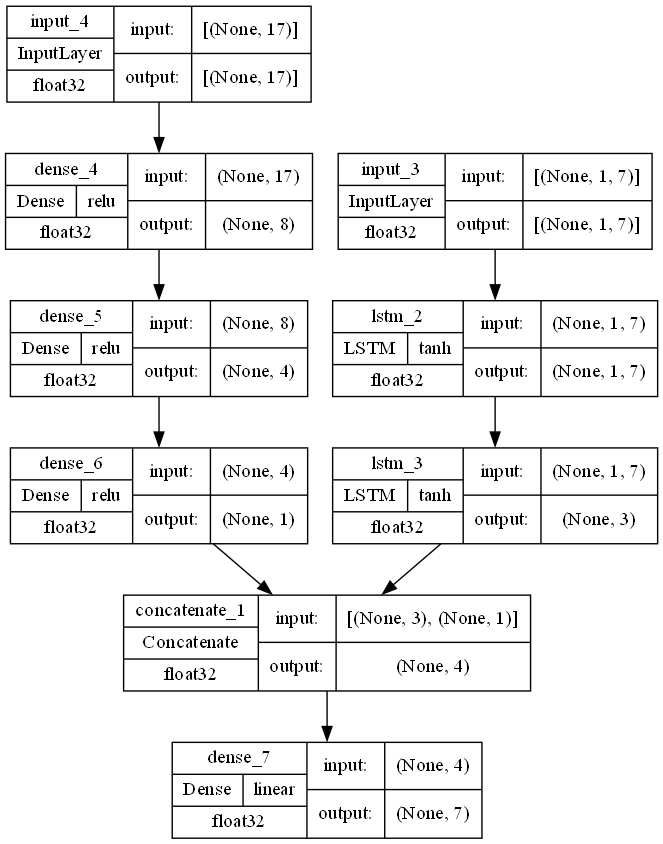

In [196]:
plot_model(model_nn,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=100,
    layer_range=None,
    show_layer_activations=True)

## Prepare Input

### Left Branch

In [197]:
left_df = df_gabung_long.iloc[:,2:].to_numpy()
left_df = left_df.astype('float32')
left_df

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]], dtype=float32)

### Right Branch

In [198]:
right_df = df_gabung_long['x_price']
right_df

0        [0.08075840741815742, 0.07500566197616174, 0.0...
1        [0.07500566197616174, 0.08253792017385496, 0.1...
2        [0.08253792017385496, 0.11698922038766922, 0.1...
3        [0.11698922038766922, 0.11839616830697988, 0.1...
4        [0.11839616830697988, 0.13441154018510995, 0.1...
                               ...                        
20195    [-0.7609416493957146, -0.7662245026340819, -0....
20196    [-0.7662245026340819, -0.7713436978517734, -0....
20197    [-0.7713436978517734, -0.768941818972556, -0.7...
20198    [-0.768941818972556, -0.7588953474828987, -0.7...
20199    [-0.7588953474828987, -0.7858683036675098, -0....
Name: x_price, Length: 20200, dtype: object

In [199]:
right_df = np.array(right_df.tolist())
right_df = np.reshape(right_df,(right_df.shape[0],1,right_df.shape[1]))
right_df.shape

(20200, 1, 7)

### Y

In [200]:
y_output = df_gabung_long['y_price']
y_output = np.array(y_output.tolist())
y_output

array([[ 0.11568207,  0.12868871,  0.13925032, ...,  0.15258723,
         0.15921364,  0.17109802],
       [ 0.12868871,  0.13925032,  0.15421536, ...,  0.15921364,
         0.17109802,  0.1686085 ],
       [ 0.13925032,  0.15421536,  0.15258723, ...,  0.17109802,
         0.1686085 ,  0.18137622],
       ...,
       [-0.79410381, -0.79381682, -0.79608285, ..., -0.80540014,
        -0.80834464, -0.80773946],
       [-0.79381682, -0.79608285, -0.80024226, ..., -0.80834464,
        -0.80773946, -0.80624771],
       [-0.79608285, -0.80024226, -0.80540014, ..., -0.80773946,
        -0.80624771, -0.79750071]])

## Compile, Training ,Running

In [201]:
reducelr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    verbose=0,
    mode='auto',
    min_delta=0.0000000001,
    cooldown=0,
    min_lr=0,
)


early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
)

In [202]:
model_nn.compile(loss='mean_squared_error',metrics='mean_absolute_error',optimizer='adam')

In [203]:
history = model_nn.fit([left_df,right_df],y_output,epochs=100,validation_split=0.2,callbacks=[reducelr,early_stop])

Epoch 1/100
505/505 [==============================] - 9s 8ms/step - loss: 0.4249 - mean_absolute_error: 0.4187 - val_loss: 0.8029 - val_mean_absolute_error: 0.3987 - lr: 0.0010
Epoch 2/100
505/505 [==============================] - 3s 5ms/step - loss: 0.0875 - mean_absolute_error: 0.1643 - val_loss: 0.4628 - val_mean_absolute_error: 0.2267 - lr: 0.0010
Epoch 3/100
505/505 [==============================] - 3s 5ms/step - loss: 0.0274 - mean_absolute_error: 0.0768 - val_loss: 0.3206 - val_mean_absolute_error: 0.1641 - lr: 0.0010
Epoch 4/100
505/505 [==============================] - 3s 5ms/step - loss: 0.0130 - mean_absolute_error: 0.0525 - val_loss: 0.2493 - val_mean_absolute_error: 0.1392 - lr: 0.0010
Epoch 5/100
505/505 [==============================] - 2s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0433 - val_loss: 0.2041 - val_mean_absolute_error: 0.1243 - lr: 0.0010
Epoch 6/100
505/505 [==============================] - 3s 5ms/step - loss: 0.0056 - mean_absolute_error: 0.038

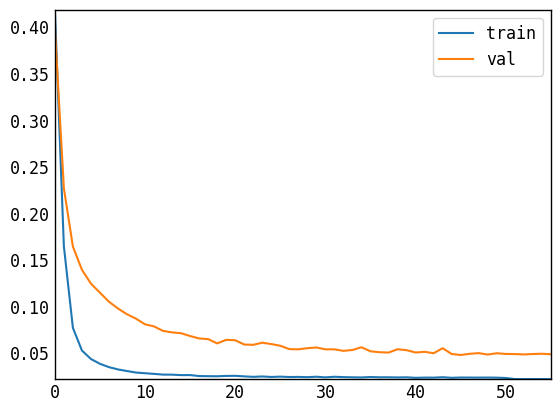

In [204]:
plt.plot(history.history['mean_absolute_error'],label='train')
plt.plot(history.history['val_mean_absolute_error'],label='val')
plt.legend()
plt.show()

In [205]:
print("hasil_predict",model_nn.predict([np.reshape(left_df[0],(1,left_df[0].shape[0])), np.reshape(right_df[0],(1,right_df[0].shape[0],right_df[0].shape[1]))]))
print("hasil_sebenarnya",y_output[0])

1/1 [==============================] - 2s 2s/step
hasil_predict [[0.13828373 0.1376831  0.1397512  0.13882232 0.14099899 0.14081722
  0.14032066]]
hasil_sebenarnya [0.11568207 0.12868871 0.13925032 0.15421536 0.15258723 0.15921364
 0.17109802]


masukkin objeknya harusnya dalam bentuk list jangan menggunakan numpy